In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.show_versions(as_json=False)



INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.8.8.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.2.4
numpy            : 1.20.1
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 52.0.0.post20210125
Cython           : 0.29.23
pytest           : 6.2.3
hypothesis       : None
sphinx           : 4.0.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.8
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.22.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck 

In [3]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
Note: you may need to restart the kernel to use updated packages.
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref

In [4]:
df = pd.read_csv("water_potability.csv")
df.head()

pywinpty                           0.5.7
PyYAML                             5.4.1
pyzmq                              20.0.0
QDarkStyle                         2.8.1
QtAwesome                          1.0.2
qtconsole                          5.0.3
QtPy                               1.9.0
regex                              2021.4.4
requests                           2.25.1
rope                               0.18.0
Rtree                              0.9.7
ruamel-yaml-conda                  0.15.100
scikit-image                       0.18.1
scikit-learn                       0.24.1
scipy                              1.6.2
seaborn                            0.11.1
Send2Trash                         1.5.0
setuptools                         52.0.0.post20210125
simplegeneric                      0.8.1
singledispatch                     0.0.0
sip                                4.19.13
six                                1.15.0
sniffio                            1.2.0
snowballstemmer             

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<AxesSubplot:xlabel='Potability', ylabel='count'>

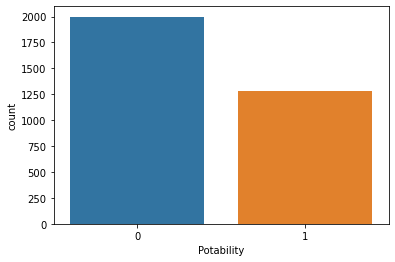

In [8]:
sns.countplot(x='Potability',data=df )

In [9]:

df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [10]:

print(f"0 : {round(1998 /3276 * 100 , 2)}")
print(f"1 : {round(1278 /3276 * 100 , 2)}")

0 : 60.99
1 : 39.01


In [11]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
for feature in df.columns:
    if df[feature].isnull().sum()>0:
        print(f"{feature} : {round(df[feature].isnull().mean(),4)*100}%")

ph : 14.99%
Sulfate : 23.84%
Trihalomethanes : 4.95%


In [13]:
## Fill missing values with median
for feature in df.columns:
    df[feature].fillna(df[feature].median() , inplace = True)

In [14]:
## find dublicate rows in dataset
duplicate = df[df.duplicated()]
duplicate

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [15]:
for i in df.columns:
    print(f" {i}  :  {len(df[i].unique())}")

 ph  :  2785
 Hardness  :  3276
 Solids  :  3276
 Chloramines  :  3276
 Sulfate  :  2495
 Conductivity  :  3276
 Organic_carbon  :  3276
 Trihalomethanes  :  3115
 Turbidity  :  3276
 Potability  :  2


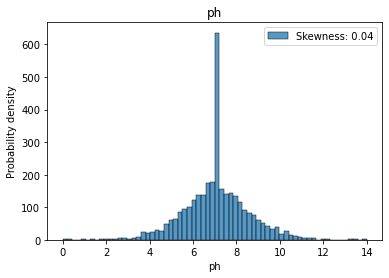

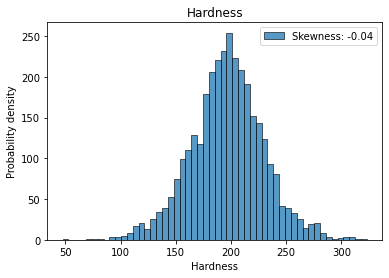

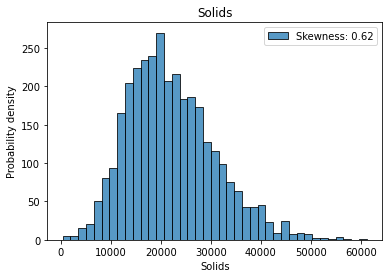

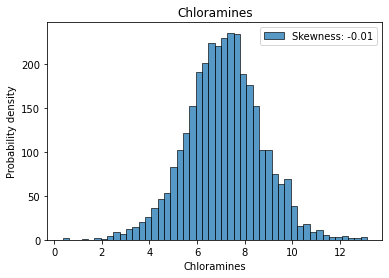

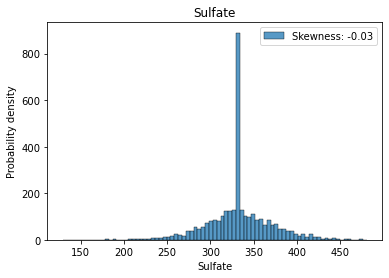

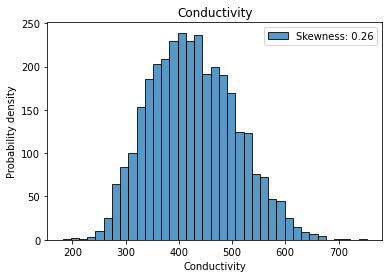

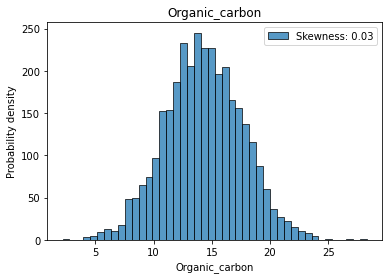

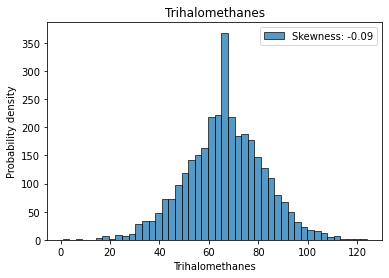

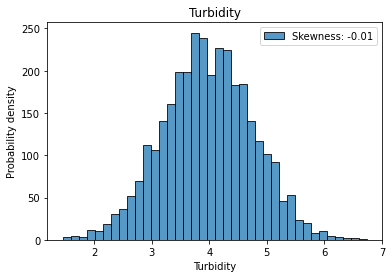

In [16]:
for feature in df.columns:
    if feature == "Potability":
        pass
    else: 
        bar = sns.histplot(df[feature] , kde_kws = {'bw' : 1} , )
        bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
        plt.xlabel(feature)
        plt.ylabel("Probability density")
        plt.title(feature)
        plt.show()

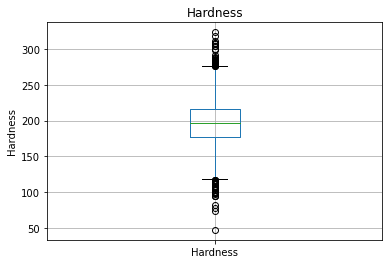

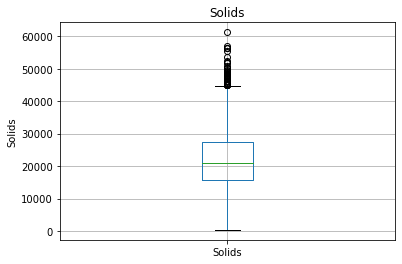

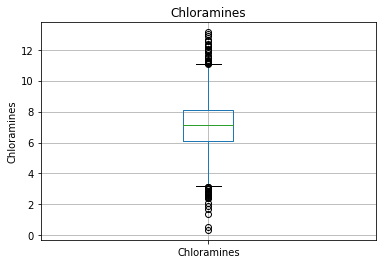

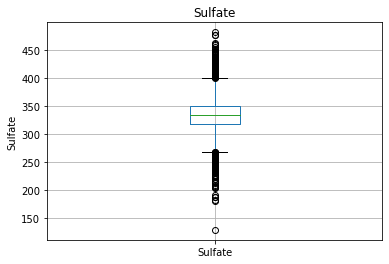

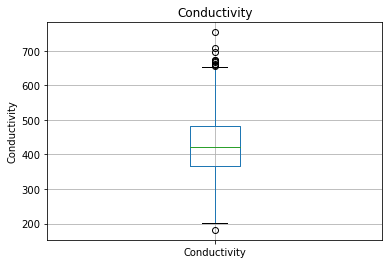

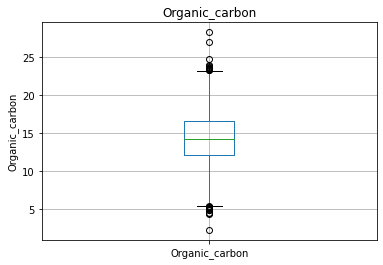

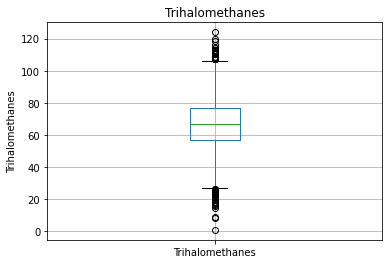

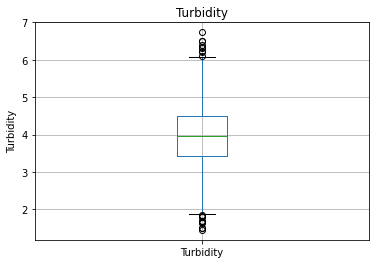

In [17]:
# we don't have missing values in our dataset so we can skip if condition 
for feature in df.columns:
    if 0 in df[feature].unique():# because log 0 is not defined thats why we are using this condition or we can also use log1p
        pass
    else:
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [18]:
# removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ph                     1.592377
Hardness              39.816918
Solids             11666.071825
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2666, 10)

In [20]:

df["Potability"].value_counts()

0    1671
1     995
Name: Potability, dtype: int64

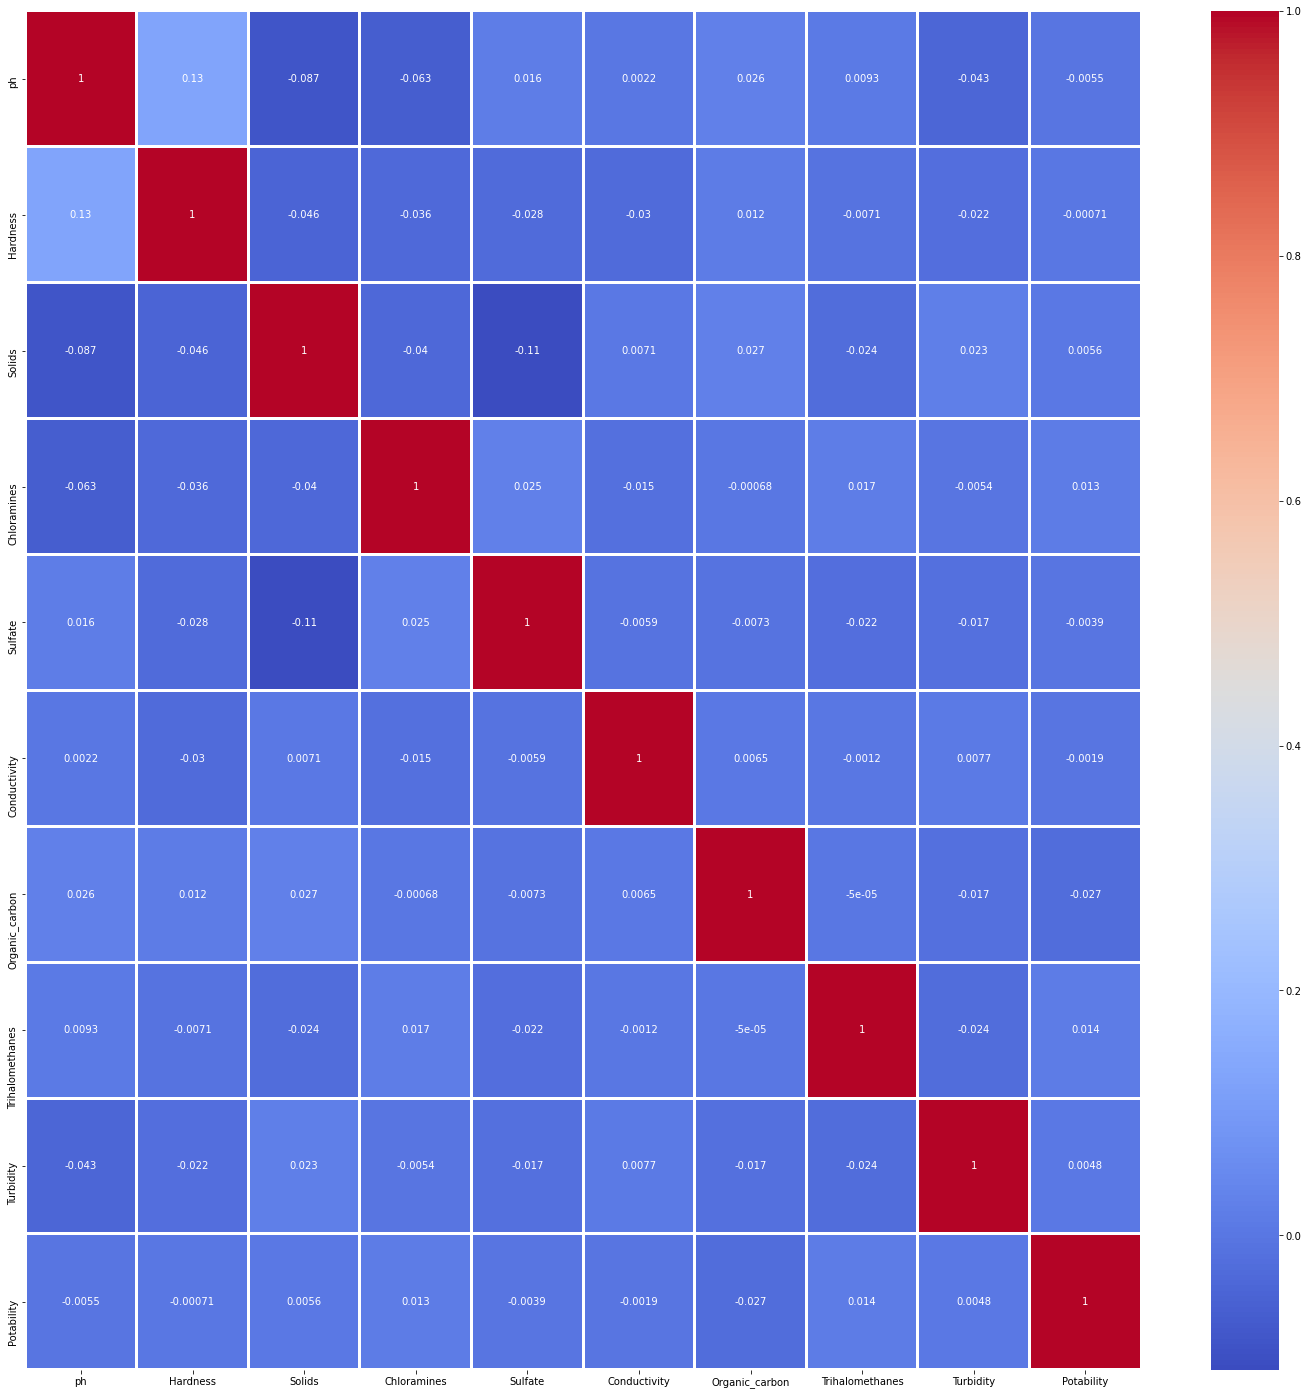

In [21]:
## Correlation
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [22]:
### Multivariate analysis
#sns.pairplot(df ,  height=10 , size = 5 , hue = "Potability" )

In [23]:
### splitting data into x and y
X = df.iloc[: , : -1]
y = df.iloc[ : , -1]

In [24]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 5)

In [25]:
#from collections import Counter
#from imblearn.over_sampling import SMOTE

In [26]:
#counter = Counter(y_train)
#print(f"before oversampling: {counter}")
#smt = SMOTE()
#X_train , y_train = smt.fit_resample(X_train , y_train)
#counter = Counter(y_train)
#print(f"after oversampling : {counter}")

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_final = sc.fit_transform(X_train)
X_test_final = sc.transform(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', class_weight = "balanced_subsample",random_state = 51)
rf_classifier.fit(X_train_final, y_train)
y_pred = rf_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred)

0.62875

In [30]:
0.62875

0.62875

In [31]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74       497
           1       0.52      0.24      0.33       303

    accuracy                           0.63       800
   macro avg       0.59      0.55      0.54       800
weighted avg       0.60      0.63      0.59       800



In [32]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC(class_weight = "balanced" )
svc_classifier.fit(X_train_final, y_train)
y_pred_scv = svc_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_scv)

0.6225

In [33]:
print(classification_report(y_test, y_pred_scv))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       497
           1       0.50      0.50      0.50       303

    accuracy                           0.62       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.62      0.62      0.62       800



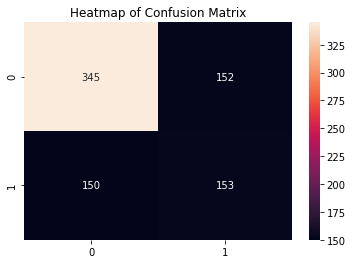

In [34]:
cm = confusion_matrix(y_test, y_pred_scv)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True, fmt = "d")
plt.show()

In [35]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 200 , 400 , 600 , 800], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 200, 400, 600, 800],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [39]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC(class_weight = "balanced"  , C=100, gamma=0.01)
svc_classifier.fit(X_train_final, y_train)
y_pred_scv = svc_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_scv)

0.6325

In [40]:
from sklearn.svm import SVC
import pickle

# save model
pickle.dump(svc_classifier, open('model.pkl', 'wb'))

# load model
water_quality_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred =water_quality_model.predict(X_test_final)

# confusion matrix
print('Confusion matrix of Support vector Machine : \n',confusion_matrix(y_test, y_pred),'\n')

Confusion matrix of Support vector Machine : 
 [[362 135]
 [159 144]] 

